<h1>Links to datasets</h1>

Dataset: https://www.kaggle.com/datasets/mrajaxnp/cert-insider-threat-detection-research/data?select=http.csv

<h1>Imported Libraries</h1>

In [1]:
# Basic Libraries
import pandas as pd
import re
import string
import numpy as np
import nltk
from scipy import stats
import warnings


# NLP Tools
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Download required NLTK data (only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OnilChibaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OnilChibaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1>Pre Pre-processing</h1>

In [2]:
dataset = pd.read_csv('test.csv')
dataset.head()

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010 06:36:41,HDB1666,PC-6793,Louis.Bernard.Garza@dtaa.com,Emery.Ali.Holloway@dtaa.com,Hector.Donovan.Bray@dtaa.com,Hector.Donovan.Bray@dtaa.com,Send,45659,NaN,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010 06:40:02,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Luke.Grant.Mcmahon@dtaa.com,View,34142,NaN,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010 06:42:48,HDB1666,PC-6793,Quintessa.O.Farrell@harris.com,Hector.Donovan.Bray@dtaa.com,NaN,Hector.Donovan.Bray@dtaa.com,Send,1310925,C:\28X79b6\0PAGXTJ8.doc(1119253);C:\11b38g6\5M...,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010 06:45:42,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Travis.Ezra.Warner@dtaa.com,View,23043,NaN,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010 06:47:07,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Kenyon.William.Delacruz@dtaa.com,View,25210,NaN,Much like all the other large groups of prison...


In [3]:
dataset['attachments'] = dataset['attachments'].apply(lambda x: x.count(';') + 1 if pd.notna(x) else 0)
dataset.head()

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010 06:36:41,HDB1666,PC-6793,Louis.Bernard.Garza@dtaa.com,Emery.Ali.Holloway@dtaa.com,Hector.Donovan.Bray@dtaa.com,Hector.Donovan.Bray@dtaa.com,Send,45659,0,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010 06:40:02,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Luke.Grant.Mcmahon@dtaa.com,View,34142,0,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010 06:42:48,HDB1666,PC-6793,Quintessa.O.Farrell@harris.com,Hector.Donovan.Bray@dtaa.com,NaN,Hector.Donovan.Bray@dtaa.com,Send,1310925,2,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010 06:45:42,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Travis.Ezra.Warner@dtaa.com,View,23043,0,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010 06:47:07,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Kenyon.William.Delacruz@dtaa.com,View,25210,0,Much like all the other large groups of prison...


In [4]:
dataset = dataset.drop(columns='activity', axis=1)
dataset = dataset.head(1000)
dataset.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010 06:36:41,HDB1666,PC-6793,Louis.Bernard.Garza@dtaa.com,Emery.Ali.Holloway@dtaa.com,Hector.Donovan.Bray@dtaa.com,Hector.Donovan.Bray@dtaa.com,45659,0,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010 06:40:02,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Luke.Grant.Mcmahon@dtaa.com,34142,0,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010 06:42:48,HDB1666,PC-6793,Quintessa.O.Farrell@harris.com,Hector.Donovan.Bray@dtaa.com,NaN,Hector.Donovan.Bray@dtaa.com,1310925,2,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010 06:45:42,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Travis.Ezra.Warner@dtaa.com,23043,0,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010 06:47:07,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Kenyon.William.Delacruz@dtaa.com,25210,0,Much like all the other large groups of prison...


<h1>Pre-processing</h1>

In [5]:
# Split the 'datetime' column into 'date' and 'time' columns
split_df = dataset['date'].str.split(' ', expand=True)
dataset['date'] = split_df[0]
dataset['time'] = split_df[1].fillna('00:00:00')  # Fill missing time values with a default time if needed
dataset.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content,time
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010,HDB1666,PC-6793,Louis.Bernard.Garza@dtaa.com,Emery.Ali.Holloway@dtaa.com,Hector.Donovan.Bray@dtaa.com,Hector.Donovan.Bray@dtaa.com,45659,0,"Now Sylvia, the object of Aminta's desire, arr...",06:36:41
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Luke.Grant.Mcmahon@dtaa.com,34142,0,"On May 14, they picked up 44 more Iroquois at ...",06:40:02
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010,HDB1666,PC-6793,Quintessa.O.Farrell@harris.com,Hector.Donovan.Bray@dtaa.com,NaN,Hector.Donovan.Bray@dtaa.com,1310925,2,Sylvia is notable for its mythological Arcadia...,06:42:48
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Travis.Ezra.Warner@dtaa.com,23043,0,Lanctot (1967) and Smith do not identify any s...,06:45:42
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Kenyon.William.Delacruz@dtaa.com,25210,0,Much like all the other large groups of prison...,06:47:07


In [6]:
# Convert email addresses to the number of addresses in each row
dataset['to'] = dataset['to'].str.count(';') + 1
dataset.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content,time
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010,HDB1666,PC-6793,1,Emery.Ali.Holloway@dtaa.com,Hector.Donovan.Bray@dtaa.com,Hector.Donovan.Bray@dtaa.com,45659,0,"Now Sylvia, the object of Aminta's desire, arr...",06:36:41
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010,HDB1666,PC-6793,1,NaN,NaN,Luke.Grant.Mcmahon@dtaa.com,34142,0,"On May 14, they picked up 44 more Iroquois at ...",06:40:02
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010,HDB1666,PC-6793,1,Hector.Donovan.Bray@dtaa.com,NaN,Hector.Donovan.Bray@dtaa.com,1310925,2,Sylvia is notable for its mythological Arcadia...,06:42:48
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010,HDB1666,PC-6793,1,NaN,NaN,Travis.Ezra.Warner@dtaa.com,23043,0,Lanctot (1967) and Smith do not identify any s...,06:45:42
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010,HDB1666,PC-6793,1,NaN,NaN,Kenyon.William.Delacruz@dtaa.com,25210,0,Much like all the other large groups of prison...,06:47:07


In [7]:
# Convert cc addresses to the number of addresses in each row
dataset['cc'] = dataset['cc'].apply(lambda x: x.count(';') + 1 if pd.notna(x) else 0)
dataset.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content,time
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010,HDB1666,PC-6793,1,1,Hector.Donovan.Bray@dtaa.com,Hector.Donovan.Bray@dtaa.com,45659,0,"Now Sylvia, the object of Aminta's desire, arr...",06:36:41
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010,HDB1666,PC-6793,1,0,NaN,Luke.Grant.Mcmahon@dtaa.com,34142,0,"On May 14, they picked up 44 more Iroquois at ...",06:40:02
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010,HDB1666,PC-6793,1,1,NaN,Hector.Donovan.Bray@dtaa.com,1310925,2,Sylvia is notable for its mythological Arcadia...,06:42:48
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010,HDB1666,PC-6793,1,0,NaN,Travis.Ezra.Warner@dtaa.com,23043,0,Lanctot (1967) and Smith do not identify any s...,06:45:42
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010,HDB1666,PC-6793,1,0,NaN,Kenyon.William.Delacruz@dtaa.com,25210,0,Much like all the other large groups of prison...,06:47:07


In [8]:
# Convert bcc addresses to the number of addresses in each row
dataset['bcc'] = dataset['bcc'].apply(lambda x: x.count(';') + 1 if pd.notna(x) else 0)
dataset.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content,time
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010,HDB1666,PC-6793,1,1,1,Hector.Donovan.Bray@dtaa.com,45659,0,"Now Sylvia, the object of Aminta's desire, arr...",06:36:41
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010,HDB1666,PC-6793,1,0,0,Luke.Grant.Mcmahon@dtaa.com,34142,0,"On May 14, they picked up 44 more Iroquois at ...",06:40:02
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010,HDB1666,PC-6793,1,1,0,Hector.Donovan.Bray@dtaa.com,1310925,2,Sylvia is notable for its mythological Arcadia...,06:42:48
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010,HDB1666,PC-6793,1,0,0,Travis.Ezra.Warner@dtaa.com,23043,0,Lanctot (1967) and Smith do not identify any s...,06:45:42
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010,HDB1666,PC-6793,1,0,0,Kenyon.William.Delacruz@dtaa.com,25210,0,Much like all the other large groups of prison...,06:47:07


In [9]:
# Convert the text in 'from' to lowercase
dataset['from'] = dataset['from'].str.lower()
dataset.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content,time
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010,HDB1666,PC-6793,1,1,1,hector.donovan.bray@dtaa.com,45659,0,"Now Sylvia, the object of Aminta's desire, arr...",06:36:41
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010,HDB1666,PC-6793,1,0,0,luke.grant.mcmahon@dtaa.com,34142,0,"On May 14, they picked up 44 more Iroquois at ...",06:40:02
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010,HDB1666,PC-6793,1,1,0,hector.donovan.bray@dtaa.com,1310925,2,Sylvia is notable for its mythological Arcadia...,06:42:48
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010,HDB1666,PC-6793,1,0,0,travis.ezra.warner@dtaa.com,23043,0,Lanctot (1967) and Smith do not identify any s...,06:45:42
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010,HDB1666,PC-6793,1,0,0,kenyon.william.delacruz@dtaa.com,25210,0,Much like all the other large groups of prison...,06:47:07


In [10]:
# Rearrange columns
dataset = dataset[['id', 'pc', 'user', 'date', 'time', 'from', 'to', 'cc', 'bcc', 'size', 'attachments', 'content']]
dataset.head()

,id,pc,user,date,time,from,to,cc,bcc,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},PC-6793,HDB1666,01/02/2010,06:36:41,hector.donovan.bray@dtaa.com,1,1,1,45659,0,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},PC-6793,HDB1666,01/02/2010,06:40:02,luke.grant.mcmahon@dtaa.com,1,0,0,34142,0,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},PC-6793,HDB1666,01/02/2010,06:42:48,hector.donovan.bray@dtaa.com,1,1,0,1310925,2,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},PC-6793,HDB1666,01/02/2010,06:45:42,travis.ezra.warner@dtaa.com,1,0,0,23043,0,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},PC-6793,HDB1666,01/02/2010,06:47:07,kenyon.william.delacruz@dtaa.com,1,0,0,25210,0,Much like all the other large groups of prison...


In [11]:
# Remove '/' from the 'date'
dataset['date'] = dataset['date'].str.replace('/', '')
dataset.head()

,id,pc,user,date,time,from,to,cc,bcc,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},PC-6793,HDB1666,01022010,06:36:41,hector.donovan.bray@dtaa.com,1,1,1,45659,0,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},PC-6793,HDB1666,01022010,06:40:02,luke.grant.mcmahon@dtaa.com,1,0,0,34142,0,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},PC-6793,HDB1666,01022010,06:42:48,hector.donovan.bray@dtaa.com,1,1,0,1310925,2,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},PC-6793,HDB1666,01022010,06:45:42,travis.ezra.warner@dtaa.com,1,0,0,23043,0,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},PC-6793,HDB1666,01022010,06:47:07,kenyon.william.delacruz@dtaa.com,1,0,0,25210,0,Much like all the other large groups of prison...


In [12]:
# Remove ':' from the 'time'
dataset['time'] = dataset['time'].str.replace(':', '')
dataset.head()

,id,pc,user,date,time,from,to,cc,bcc,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},PC-6793,HDB1666,01022010,063641,hector.donovan.bray@dtaa.com,1,1,1,45659,0,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},PC-6793,HDB1666,01022010,064002,luke.grant.mcmahon@dtaa.com,1,0,0,34142,0,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},PC-6793,HDB1666,01022010,064248,hector.donovan.bray@dtaa.com,1,1,0,1310925,2,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},PC-6793,HDB1666,01022010,064542,travis.ezra.warner@dtaa.com,1,0,0,23043,0,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},PC-6793,HDB1666,01022010,064707,kenyon.william.delacruz@dtaa.com,1,0,0,25210,0,Much like all the other large groups of prison...


In [13]:
# Remove the "PC-" prefix
dataset['pc'] = dataset['pc'].str.replace('PC-', '')
dataset.head()

,id,pc,user,date,time,from,to,cc,bcc,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},6793,HDB1666,01022010,063641,hector.donovan.bray@dtaa.com,1,1,1,45659,0,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},6793,HDB1666,01022010,064002,luke.grant.mcmahon@dtaa.com,1,0,0,34142,0,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},6793,HDB1666,01022010,064248,hector.donovan.bray@dtaa.com,1,1,0,1310925,2,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},6793,HDB1666,01022010,064542,travis.ezra.warner@dtaa.com,1,0,0,23043,0,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},6793,HDB1666,01022010,064707,kenyon.william.delacruz@dtaa.com,1,0,0,25210,0,Much like all the other large groups of prison...


In [14]:
# Rearrange columns
dataset = dataset[['id', 'user', 'from', 'pc','date', 'time', 'to', 'cc', 'bcc', 'size', 'attachments', 'content']]
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,6793,01022010,063641,1,1,1,45659,0,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,6793,01022010,064002,1,0,0,34142,0,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,6793,01022010,064248,1,1,0,1310925,2,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,6793,01022010,064542,1,0,0,23043,0,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,6793,01022010,064707,1,0,0,25210,0,Much like all the other large groups of prison...


In [15]:
# Character Count
dataset['char_count'] = dataset['content'].apply(len)

# Word Count
dataset['word_count'] = dataset['content'].apply(lambda x: len(x.split()))

# Average Word Length
dataset['avg_word_length'] = dataset['content'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)

# Counting the number of sentences
dataset['sentence_count'] = dataset['content'].apply(lambda x: len(sent_tokenize(x)))

In [16]:
# Rearrange columns
dataset = dataset[['id', 'user', 'from', 'pc','date', 'time', 'to', 'cc', 'bcc', 'size', 'attachments', 'char_count', 'word_count', 'avg_word_length', 'sentence_count', 'content']]
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,content
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,6793,01022010,063641,1,1,1,45659,0,507,87,4.839080,4,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,6793,01022010,064002,1,0,0,34142,0,470,81,4.814815,4,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,6793,01022010,064248,1,1,0,1310925,2,731,108,5.777778,5,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,6793,01022010,064542,1,0,0,23043,0,640,103,5.223301,5,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,6793,01022010,064707,1,0,0,25210,0,991,168,4.904762,5,Much like all the other large groups of prison...


In [17]:
# Convert column 'pc', 'date' and time to int64
dataset['pc'] = dataset['pc'].astype('int64')

dataset['date'] = dataset['date'].astype('int64')

dataset['time'] = dataset['time'].astype('int64')
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,content
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,6793,1022010,63641,1,1,1,45659,0,507,87,4.839080,4,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,6793,1022010,64002,1,0,0,34142,0,470,81,4.814815,4,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,6793,1022010,64248,1,1,0,1310925,2,731,108,5.777778,5,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,6793,1022010,64542,1,0,0,23043,0,640,103,5.223301,5,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,6793,1022010,64707,1,0,0,25210,0,991,168,4.904762,5,Much like all the other large groups of prison...


In [18]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Standardize numeric columns
scaler = StandardScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
dataset.head() 

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,content
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.458101,-0.397527,1.342005,2.187303,-0.271922,-0.326270,-0.273691,-0.140403,-0.912312,0.026232,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,0.659894,0.0,-2.434363,-0.397527,-0.561548,-0.425962,-0.289310,-0.326270,-0.451853,-0.319603,-0.980549,0.026232,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.418187,-0.397527,1.342005,-0.425962,1.638317,2.722979,0.804913,0.486796,1.727396,0.930790,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,0.659894,0.0,-2.398855,-0.397527,-0.561548,-0.425962,-0.306067,-0.326270,0.366730,0.337463,0.168154,0.930790,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,0.659894,0.0,-2.388005,-0.397527,-0.561548,-0.425962,-0.302795,-0.326270,2.056865,2.278793,-0.727609,0.930790,Much like all the other large groups of prison...


<h1>Identify numerical anomalies</h1>

In [19]:
# Calculate Z-scores
z_scores = stats.zscore(dataset.select_dtypes(include=['float64', 'int64']))

# Get boolean DataFrame indicating the presence of anomalies (using a threshold of 2)
anomalies_bool_df = pd.DataFrame(z_scores, columns=dataset.select_dtypes(include=['float64', 'int64']).columns, index=dataset.index)
anomalies_bool_df = (anomalies_bool_df > 2) | (anomalies_bool_df < -2)

# Extract anomalies
anomalies = dataset[anomalies_bool_df.any(axis=1)]

# Drop anomalies from the original dataset
df_no_anomalies = dataset.drop(anomalies.index)

# Display the datasets
print("Normal Dataset:")
print(df_no_anomalies)
print("\nAnomalous Dataset:")
print(anomalies)

Normal Dataset:
                           id     user                            from  \
19   {T5D4-B0FG27UL-9243ZUGJ}  ATH0225  alana.brianna.everett@dtaa.com   
20   {P0N5-C8ID55NI-2897XEXX}  ATH0225              adw6237@harris.com   
21   {A3Z5-U4UI50GY-6379TGRR}  ATH0225    brody.vernon.bonner@dtaa.com   
22   {Q6S8-M9BJ01TI-8186CLWV}  ATH0225    dorian.gannon.nixon@dtaa.com   
23   {H0N1-F6NZ57SL-4079CFRZ}  ATH0225                  ath3@gmail.com   
..                        ...      ...                             ...   
993  {T2P7-H9HS75RF-9539LKYU}  SRS0129       samuel_shaw@sbcglobal.net   
994  {E6A8-B2UR24GD-4104KLTX}  SRS0129   hill-plato@lockheedmartin.com   
995  {N7W4-Q8CR83IT-2226JEBG}  LAN1329   jordan.hannah.booker@dtaa.com   
996  {R7M9-M9QH81UT-8516NVEO}  GAH0525      dillon.josiah.roy@dtaa.com   
999  {W9H9-I6ZZ46QD-9033VSKL}  IPK2575      isaac.phelan.kent@dtaa.com   

           pc  date      time        to        cc       bcc      size  \
19   1.029446   0.0 -1

In [20]:
df_no_anomalies['numeric_anomalies'] = 0
anomalies['numeric_anomalies'] = 1
# Combine dataframes vertically
dataset = pd.concat([df_no_anomalies, anomalies])

# Order by index
dataset = dataset.sort_index()
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,content,numeric_anomalies
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.458101,-0.397527,1.342005,2.187303,-0.271922,-0.326270,-0.273691,-0.140403,-0.912312,0.026232,"Now Sylvia, the object of Aminta's desire, arr...",1
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,0.659894,0.0,-2.434363,-0.397527,-0.561548,-0.425962,-0.289310,-0.326270,-0.451853,-0.319603,-0.980549,0.026232,"On May 14, they picked up 44 more Iroquois at ...",1
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.418187,-0.397527,1.342005,-0.425962,1.638317,2.722979,0.804913,0.486796,1.727396,0.930790,Sylvia is notable for its mythological Arcadia...,1
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,0.659894,0.0,-2.398855,-0.397527,-0.561548,-0.425962,-0.306067,-0.326270,0.366730,0.337463,0.168154,0.930790,Lanctot (1967) and Smith do not identify any s...,1
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,0.659894,0.0,-2.388005,-0.397527,-0.561548,-0.425962,-0.302795,-0.326270,2.056865,2.278793,-0.727609,0.930790,Much like all the other large groups of prison...,1


<h1>Text Pre-processing</h1>

In [21]:
# Convert the text in 'content' to lowercase
dataset['content'] = dataset['content'].str.lower()
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,content,numeric_anomalies
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.458101,-0.397527,1.342005,2.187303,-0.271922,-0.326270,-0.273691,-0.140403,-0.912312,0.026232,"now sylvia, the object of aminta's desire, arr...",1
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,0.659894,0.0,-2.434363,-0.397527,-0.561548,-0.425962,-0.289310,-0.326270,-0.451853,-0.319603,-0.980549,0.026232,"on may 14, they picked up 44 more iroquois at ...",1
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.418187,-0.397527,1.342005,-0.425962,1.638317,2.722979,0.804913,0.486796,1.727396,0.930790,sylvia is notable for its mythological arcadia...,1
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,0.659894,0.0,-2.398855,-0.397527,-0.561548,-0.425962,-0.306067,-0.326270,0.366730,0.337463,0.168154,0.930790,lanctot (1967) and smith do not identify any s...,1
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,0.659894,0.0,-2.388005,-0.397527,-0.561548,-0.425962,-0.302795,-0.326270,2.056865,2.278793,-0.727609,0.930790,much like all the other large groups of prison...,1


In [22]:
def preprocess_email_content(email):
    # Tokenization
    tokens = word_tokenize(email)

    # Removal of stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return ' '.join(stemmed_tokens)

In [23]:
# Apply preprocessing to the 'content' column
dataset['content'] = dataset['content'].apply(preprocess_email_content)

<h1>Identifify Sentiment Anomalies</h1>

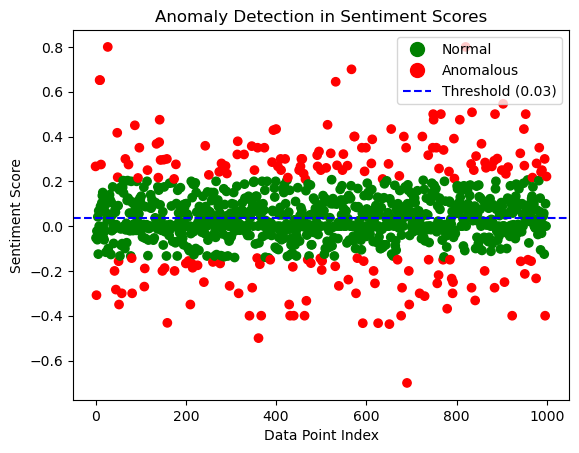

In [24]:
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.ensemble import IsolationForest

# Perform sentiment analysis and get polarity scores
dataset['sentiment_score'] = dataset['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Detect anomalies using Isolation Forest
clf = IsolationForest(contamination=0.2)
dataset['sentiment_anomaly'] = clf.fit_predict(dataset[['sentiment_score']])

# Create a color map based on the 'sentiment_anomaly' values
colors = dataset['sentiment_anomaly'].apply(lambda x: 'red' if x == -1 else 'green')

# Calculate the threshold value
threshold = dataset.loc[dataset['sentiment_anomaly'] == 1, 'sentiment_score'].mean()

# Plot sentiment scores and anomalies along with the threshold line
scatter = plt.scatter(dataset.index, dataset['sentiment_score'], c=colors, label='Data Points')
threshold_line = plt.axhline(y=threshold, color='blue', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.xlabel('Data Point Index')
plt.ylabel('Sentiment Score')
plt.title('Anomaly Detection in Sentiment Scores')

# Create a legend with labels for normal, anomalous points, and threshold line
legend_labels = {
    'Normal': plt.Line2D([0], [0], marker='o', color='green', markersize=10, label='Normal', linestyle='None'),
    'Anomalous': plt.Line2D([0], [0], marker='o', color='red', markersize=10, label='Anomalous', linestyle='None'),
    'Threshold': threshold_line,
}
plt.legend(handles=[legend_labels['Normal'], legend_labels['Anomalous'], legend_labels['Threshold']], loc='upper right')

plt.show()


In [25]:
# Replace all occurrences of 1 with 0 in 'sentiment_anomaly' and then all occurrences of -1 with 1 in the same column.
dataset['sentiment_anomaly'] = dataset['sentiment_anomaly'].replace(1, 0)
dataset['sentiment_anomaly'] = dataset['sentiment_anomaly'].replace(-1, 1)
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,content,numeric_anomalies,sentiment_score,sentiment_anomaly
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.458101,-0.397527,1.342005,2.187303,-0.271922,-0.326270,-0.273691,-0.140403,-0.912312,0.026232,"sylvia , object aminta 's desir , arriv scene ...",1,0.266667,1
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,0.659894,0.0,-2.434363,-0.397527,-0.561548,-0.425962,-0.289310,-0.326270,-0.451853,-0.319603,-0.980549,0.026232,"may 14 , pick 44 iroquoi saint franci , camp w...",1,-0.052727,0
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.418187,-0.397527,1.342005,-0.425962,1.638317,2.722979,0.804913,0.486796,1.727396,0.930790,"sylvia notabl mytholog arcadian set , creativ ...",1,-0.308333,1
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,0.659894,0.0,-2.398855,-0.397527,-0.561548,-0.425962,-0.306067,-0.326270,0.366730,0.337463,0.168154,0.930790,lanctot ( 1967 ) smith identifi specif tribe p...,1,-0.021875,0
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,0.659894,0.0,-2.388005,-0.397527,-0.561548,-0.425962,-0.302795,-0.326270,2.056865,2.278793,-0.727609,0.930790,much like larg group prison transfer mauthause...,1,-0.060606,0


In [26]:
# Add the 'target' column
dataset['target'] = dataset['numeric_anomalies'] + dataset['sentiment_anomaly']
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,content,numeric_anomalies,sentiment_score,sentiment_anomaly,target
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.458101,-0.397527,1.342005,2.187303,-0.271922,-0.326270,-0.273691,-0.140403,-0.912312,0.026232,"sylvia , object aminta 's desir , arriv scene ...",1,0.266667,1,2
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,0.659894,0.0,-2.434363,-0.397527,-0.561548,-0.425962,-0.289310,-0.326270,-0.451853,-0.319603,-0.980549,0.026232,"may 14 , pick 44 iroquoi saint franci , camp w...",1,-0.052727,0,1
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.418187,-0.397527,1.342005,-0.425962,1.638317,2.722979,0.804913,0.486796,1.727396,0.930790,"sylvia notabl mytholog arcadian set , creativ ...",1,-0.308333,1,2
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,0.659894,0.0,-2.398855,-0.397527,-0.561548,-0.425962,-0.306067,-0.326270,0.366730,0.337463,0.168154,0.930790,lanctot ( 1967 ) smith identifi specif tribe p...,1,-0.021875,0,1
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,0.659894,0.0,-2.388005,-0.397527,-0.561548,-0.425962,-0.302795,-0.326270,2.056865,2.278793,-0.727609,0.930790,much like larg group prison transfer mauthause...,1,-0.060606,0,1


In [27]:
# Identify numeric columns
numeric_columns = ['numeric_anomalies', 'sentiment_score', 'sentiment_anomaly']

# Standardize numeric columns
scaler = StandardScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,content,numeric_anomalies,sentiment_score,sentiment_anomaly,target
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.458101,-0.397527,1.342005,2.187303,-0.271922,-0.326270,-0.273691,-0.140403,-0.912312,0.026232,"sylvia , object aminta 's desir , arriv scene ...",1.447748,1.367696,2.0,2
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,0.659894,0.0,-2.434363,-0.397527,-0.561548,-0.425962,-0.289310,-0.326270,-0.451853,-0.319603,-0.980549,0.026232,"may 14 , pick 44 iroquoi saint franci , camp w...",1.447748,-0.608623,-0.5,1
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.418187,-0.397527,1.342005,-0.425962,1.638317,2.722979,0.804913,0.486796,1.727396,0.930790,"sylvia notabl mytholog arcadian set , creativ ...",1.447748,-2.190241,2.0,2
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,0.659894,0.0,-2.398855,-0.397527,-0.561548,-0.425962,-0.306067,-0.326270,0.366730,0.337463,0.168154,0.930790,lanctot ( 1967 ) smith identifi specif tribe p...,1.447748,-0.417718,-0.5,1
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,0.659894,0.0,-2.388005,-0.397527,-0.561548,-0.425962,-0.302795,-0.326270,2.056865,2.278793,-0.727609,0.930790,much like larg group prison transfer mauthause...,1.447748,-0.657375,-0.5,1


In [28]:
# Rearrange columns
dataset = dataset[['id', 'user', 'from', 'pc','date', 'time', 'to', 'cc', 'bcc', 'size', 'attachments', 'char_count', 'word_count', 'avg_word_length', 'sentence_count', 'sentiment_score', 'numeric_anomalies', 'sentiment_anomaly','content', 'target']]
dataset.head()

,id,user,from,pc,date,time,to,cc,bcc,size,attachments,char_count,word_count,avg_word_length,sentence_count,sentiment_score,numeric_anomalies,sentiment_anomaly,content,target
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.458101,-0.397527,1.342005,2.187303,-0.271922,-0.326270,-0.273691,-0.140403,-0.912312,0.026232,1.367696,1.447748,2.0,"sylvia , object aminta 's desir , arriv scene ...",2
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,luke.grant.mcmahon@dtaa.com,0.659894,0.0,-2.434363,-0.397527,-0.561548,-0.425962,-0.289310,-0.326270,-0.451853,-0.319603,-0.980549,0.026232,-0.608623,1.447748,-0.5,"may 14 , pick 44 iroquoi saint franci , camp w...",1
2,{S8C2-Q8YX87DJ-0516SIWZ},HDB1666,hector.donovan.bray@dtaa.com,0.659894,0.0,-2.418187,-0.397527,1.342005,-0.425962,1.638317,2.722979,0.804913,0.486796,1.727396,0.930790,-2.190241,1.447748,2.0,"sylvia notabl mytholog arcadian set , creativ ...",2
3,{A1V9-O5BL46SW-1708NAEC},HDB1666,travis.ezra.warner@dtaa.com,0.659894,0.0,-2.398855,-0.397527,-0.561548,-0.425962,-0.306067,-0.326270,0.366730,0.337463,0.168154,0.930790,-0.417718,1.447748,-0.5,lanctot ( 1967 ) smith identifi specif tribe p...,1
4,{N6R0-M2EI82DM-5583LSUM},HDB1666,kenyon.william.delacruz@dtaa.com,0.659894,0.0,-2.388005,-0.397527,-0.561548,-0.425962,-0.302795,-0.326270,2.056865,2.278793,-0.727609,0.930790,-0.657375,1.447748,-0.5,much like larg group prison transfer mauthause...,1


<h1>Feature Selection</h1>

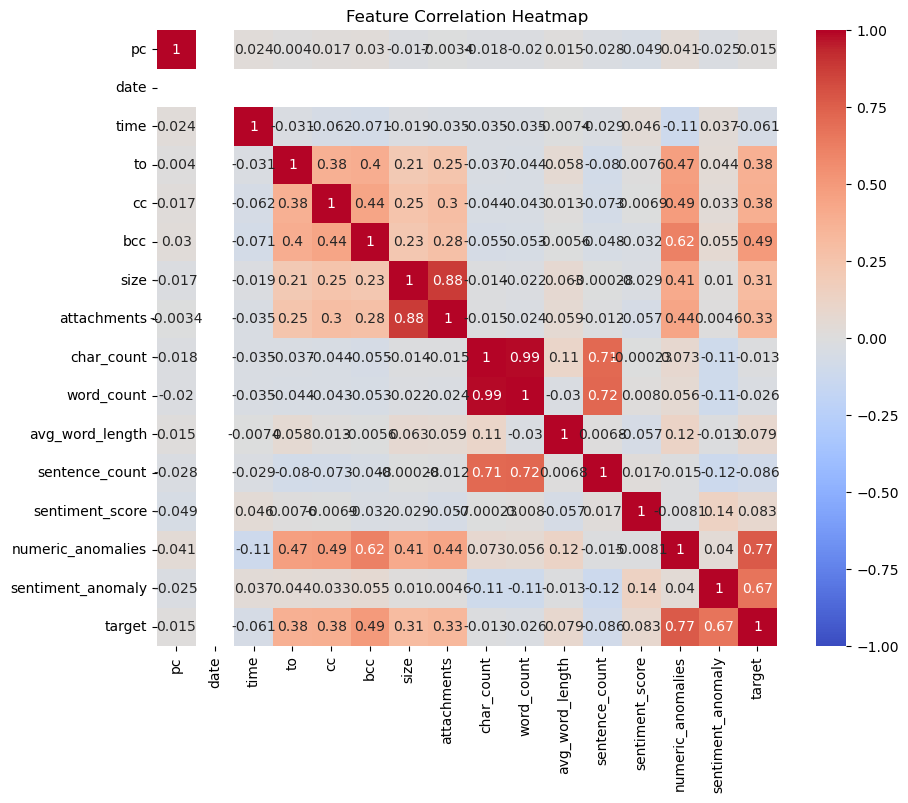

In [29]:
# Compute the correlation matrix
corr = dataset.corr()
# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the heatmap
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
# dataset = dataset[['pc','date', 'time', 'char_count', 'word_count', 'avg_word_length', 'sentence_count', 'sentiment_score', 'numeric_anomalies', 'sentiment_anomaly', 'target']]
dataset = dataset[['pc','date', 'time', 'to', 'cc', 'bcc', 'size', 'attachments', 'char_count', 'word_count', 'avg_word_length', 'sentence_count', 'sentiment_score', 'numeric_anomalies', 'sentiment_anomaly', 'target']]
X = dataset.drop('target', axis=1)  # Features
y = dataset['target']  # Target variable (0 for normal, 1 for insider threat)
feature_names = X.columns  # This is the corrected line

# 1. Filter Method
# Removing features with high correlation
correlation_matrix = pd.DataFrame(X, columns=feature_names).abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] < 0.8)]
X_filtered = pd.DataFrame(X, columns=feature_names).drop(features_to_drop, axis=1)

# 2. Wrapper Method
# Recursive Feature Elimination
estimator = LinearRegression()
selector = RFE(estimator=estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selected_features_wrapper = np.array(feature_names)[selector.support_]

# 3. Embedded Method
# Feature importances from Random Forest
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_
selected_features_embedded = np.array(feature_names)[importances > np.mean(importances)]

print("Features selected by Filter method:", list(X_filtered.columns))
print("Features selected by Wrapper method:", list(selected_features_wrapper))
print("Features selected by Embedded method:", list(selected_features_embedded))

Features selected by Filter method: ['pc', 'time', 'numeric_anomalies']
Features selected by Wrapper method: ['cc', 'char_count', 'word_count', 'numeric_anomalies', 'sentiment_anomaly']
Features selected by Embedded method: ['numeric_anomalies', 'sentiment_anomaly']


In [31]:
dataset = dataset[['pc', 'time', 'cc', 'bcc', 'size', 'sentiment_score', 'word_count', 'avg_word_length', 'target']]
dataset.head()

,pc,time,cc,bcc,size,sentiment_score,word_count,avg_word_length,target
0,0.659894,-2.458101,1.342005,2.187303,-0.271922,1.367696,-0.140403,-0.912312,2
1,0.659894,-2.434363,-0.561548,-0.425962,-0.289310,-0.608623,-0.319603,-0.980549,1
2,0.659894,-2.418187,1.342005,-0.425962,1.638317,-2.190241,0.486796,1.727396,2
3,0.659894,-2.398855,-0.561548,-0.425962,-0.306067,-0.417718,0.337463,0.168154,1
4,0.659894,-2.388005,-0.561548,-0.425962,-0.302795,-0.657375,2.278793,-0.727609,1


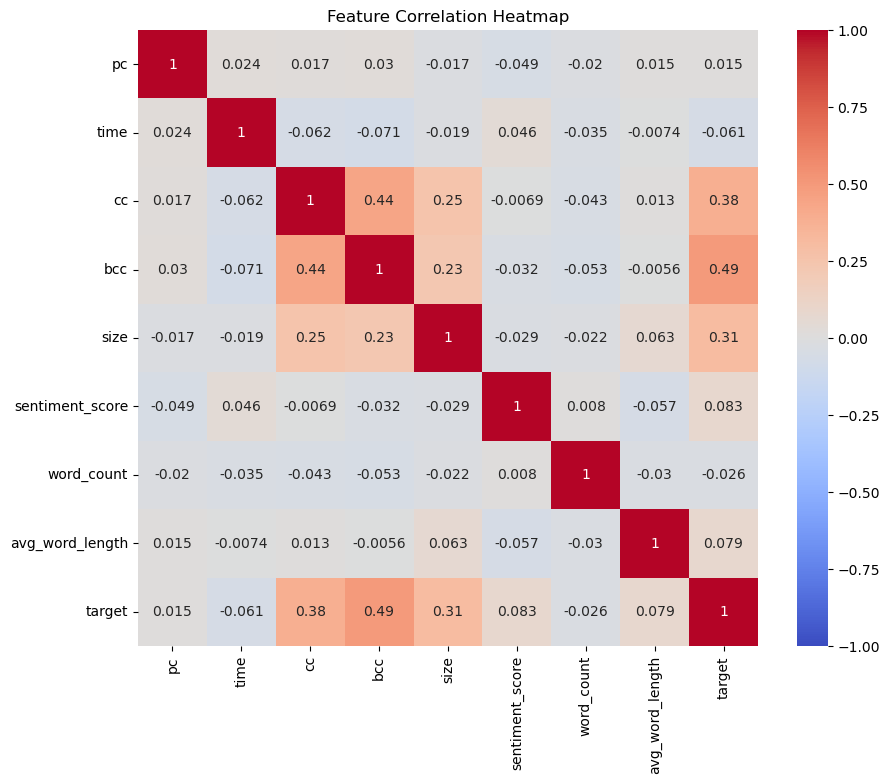

In [32]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the heatmap
plt.title("Feature Correlation Heatmap")
plt.show()

<h1>Model training and testing</h1>

In [33]:
# Split the data into training and testing sets
X = dataset.drop('target', axis=1)  # Features
y = dataset['target']  # Target variable (0 for normal, 1 for insider threat)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # split ration 30%

In [34]:
# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       158
           1       0.87      0.91      0.89       121
           2       1.00      0.24      0.38        21

    accuracy                           0.91       300
   macro avg       0.93      0.71      0.74       300
weighted avg       0.91      0.91      0.89       300



In [35]:
# Create an SVM classifier without class weights
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')  # Use average='weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')          # Use average='weighted' for multiclass

# Print the evaluation metrics
print("SVM Accuracy:", accuracy)
print("SVM Recall:", recall)
print("SVM F1-score:", f1)

SVM Accuracy: 0.71
SVM Recall: 0.71
SVM F1-score: 0.661812725090036


In [36]:
# Create a Logistic Regression classifier without class weights
logistic_classifier = LogisticRegression(random_state=42)

# Train the model
logistic_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
recall_per_class = recall_score(y_test, y_pred, average='weighted')  # Removed average='weighted' and set to None
f1_per_class = f1_score(y_test, y_pred, average='weighted')          # Removed average='weighted' and set to None

# Print the evaluation metrics
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Recall per class:", recall_per_class)
print("Logistic Regression F1-score per class:", f1_per_class)

Logistic Regression Accuracy: 0.71
Logistic Regression Recall per class: 0.71
Logistic Regression F1-score per class: 0.6726481322743528


In [37]:
# Create a Decision Tree classifier without class weights
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
tree_classifier.fit(X_train, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Calculate accuracy, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
recall_per_class = recall_score(y_test, y_pred, average='weighted')  # Removed average='weighted' and set to None
f1_per_class = f1_score(y_test, y_pred, average='weighted')          # Removed average='weighted' and set to None

# Print the evaluation metrics
print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Recall per class:", recall_per_class)
print("Decision Tree F1-score per class:", f1_per_class)

Decision Tree Accuracy: 0.9066666666666666
Decision Tree Recall per class: 0.9066666666666666
Decision Tree F1-score per class: 0.9056100838633455


In [38]:
# Create individual classifiers without class weights
random_forest = RandomForestClassifier(random_state=42)
svc_classifier = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
logistic_classifier = LogisticRegression(random_state=42)
tree_classifier = DecisionTreeClassifier(random_state=42)

# Create an ensemble classifier using voting
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', random_forest),
    ('svc', svc_classifier),
    ('logistic', logistic_classifier),
    ('tree', tree_classifier)
], voting='soft')  # Use 'soft' voting for probability-based voting

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
recall_per_class = recall_score(y_test, y_pred, average='weighted')  # Changed to average=None
f1_per_class = f1_score(y_test, y_pred, average='weighted')          # Changed to average=None

# Print the evaluation metrics
print("Ensemble Accuracy:", accuracy)
print("Ensemble Recall per class:", recall_per_class)
print("Ensemble F1-score per class:", f1_per_class)

Ensemble Accuracy: 0.89
Ensemble Recall per class: 0.89
Ensemble F1-score per class: 0.8804308943089431
